# Thermal Comfort Classifier V2.0
###### by Muhammad Zhafran A F, Danang Wahyu K, and Haidar Alghazian A

What's new?
* Using all features first to evaluate models
* Feature Importance
* Model evaluation using top features in feature importance

## Data Acquisition

In [81]:
import pandas as pd

In [82]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

In [83]:
dataset.head()

,month,season,Location,sex,Subject Code,TSV,TP,air_ts,air_tp,RH_ts,...,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,Unnamed: 32
0,1.0,1.0,S0135,1.0,FSL1,-1.0,-1,0,0,-1.0,...,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
1,1.0,1.0,S0135,1.0,FSL2,-1.0,-1,-1,0,1.0,...,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073,0.0
2,1.0,1.0,S0135,1.0,FSL3,-1.0,-1,-1,0,1.0,...,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
3,1.0,1.0,S0135,1.0,FSL4,-1.0,-1,-1,0,1.0,...,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669,0.0
4,1.0,1.0,S0135,1.0,FSL5,0.0,0,0,0,0.0,...,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364,0.0


In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

## Data Cleaning

In [85]:
dataset.isnull().sum()

month            400
season           400
Location         400
sex              400
Subject Code     400
TSV              400
TP               400
air_ts           400
air_tp           400
RH_ts            400
RH_tp            400
comfort          400
prod             400
TA               400
clo              400
Uphols           400
clo_tot          400
met              400
sh_sw            400
Ti               400
Tg               400
Va               400
RH               400
PMV              400
PPD              400
TnG_R_0.5        400
Tmr              400
Top              400
Tout             400
Trm              400
TnG_R_0.25       400
TnG_R_0.33       400
Unnamed: 32     2438
dtype: int64

There's unnamed feature that should remove from our data

In [86]:
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

There's some numeric features that's declared as object type. So, we should convert it to float64 type.

In [87]:
data = dataset.dropna()
#data

In [88]:
objectFeatures = ['air_ts', 'air_tp', 'comfort', 'prod', 'TA', 'Uphols', 'sh_sw']

for i in objectFeatures:
    data[i] = pd.to_numeric(data[i],errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 2607
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2604 non-null   float64
 8   air_tp        2604 non-null   float64
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2605 non-null   float64
 12  prod          2603 non-null   float64
 13  TA            2573 non-null   float64
 14  clo           2608 non-null   float64
 15  Uphols        2558 non-null   float64
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2516 non-null 

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5360/4148919549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.to_numeric(data[i],errors = 'coerce')


In [89]:
data.isnull().sum()

month            0
season           0
Location         0
sex              0
Subject Code     0
TSV              0
TP               0
air_ts           4
air_tp           4
RH_ts            0
RH_tp            0
comfort          3
prod             5
TA              35
clo              0
Uphols          50
clo_tot          0
met              0
sh_sw           92
Ti               0
Tg               0
Va               0
RH               0
PMV              0
PPD              0
TnG_R_0.5        0
Tmr              0
Top              0
Tout             0
Trm              0
TnG_R_0.25       0
TnG_R_0.33       0
dtype: int64

In [90]:
data = data.dropna()

Because we want to focused on TSV, we should know how many data for each class in TSV

In [91]:
data.TSV.unique()

array([-1.,  0.,  1., -2.,  2., -3.,  3.])

In [92]:
data['TSV'].value_counts()

-1.0    799
 0.0    777
 1.0    532
-2.0    175
 2.0     88
-3.0     47
 3.0     16
Name: TSV, dtype: int64

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='TSV', ylabel='count'>

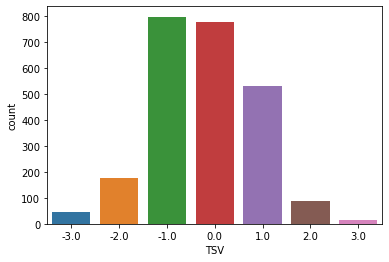

In [94]:
sns.countplot(x='TSV', data=data, order=data.TSV.unique().sort())

Because distribution data of each class is uneven, we should simplify it from 7 classes to 3 classes
* Class cold (0) : -3, -2, -1
* Class neutral (1) : 0
* Class warm (2) : 1, 2, 3

In [95]:
comfortLevel = { 3.0:2,
                 2.0:2,
                 1.0:2,
                 0.0:1,
                -1.0 :0,
                -2.0:0,
                -3.0:0}

data['TSV'] = data['TSV'].map(comfortLevel)
data.head()

,month,season,Location,sex,Subject Code,TSV,TP,air_ts,air_tp,RH_ts,...,RH,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33
0,1.0,1.0,S0135,1.0,FSL1,0,-1,0.0,0.0,-1.0,...,49.1,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110
1,1.0,1.0,S0135,1.0,FSL2,0,-1,-1.0,0.0,1.0,...,49.7,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073
2,1.0,1.0,S0135,1.0,FSL3,0,-1,-1.0,0.0,1.0,...,49.7,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110
3,1.0,1.0,S0135,1.0,FSL4,0,-1,-1.0,0.0,1.0,...,46.3,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669
4,1.0,1.0,S0135,1.0,FSL5,1,0,0.0,0.0,0.0,...,46.5,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364


<AxesSubplot:xlabel='TSV', ylabel='count'>

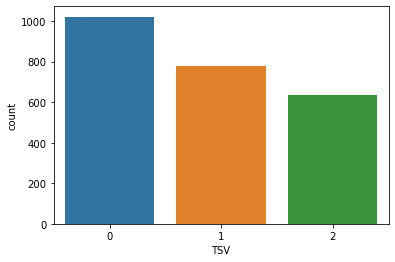

In [97]:
sns.countplot(x='TSV', data=data, order=data.TSV.unique().sort())

## Data Exploration

#### Statistic

In [98]:
data.describe()

,month,season,sex,TSV,air_ts,air_tp,RH_ts,RH_tp,comfort,prod,...,RH,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,...,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,6.082169,1.640920,1.571076,0.841824,-0.368529,-0.113804,-0.258833,-0.077239,2.677075,0.056286,...,66.900357,-0.370420,31.460548,21.498228,21.544970,21.059444,18.041304,18.138426,21.937012,21.724268
std,3.520334,0.479829,0.495024,0.809952,1.082770,0.743647,1.054795,0.679534,0.894836,0.672790,...,11.967743,1.203898,25.879182,4.948298,6.061650,5.270119,6.386078,6.475272,5.523757,5.140701
min,1.000000,1.000000,1.000000,0.000000,-3.000000,-2.000000,-3.000000,-2.000000,0.000000,-2.000000,...,30.500000,-4.343513,5.000000,11.119614,8.119420,9.119614,5.695017,7.312087,8.705920,10.368944
25%,3.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,2.000000,0.000000,...,60.300000,-1.221696,8.590282,17.784206,16.509329,16.501453,13.200000,12.843523,18.631343,18.328465
50%,6.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,69.440000,-0.525237,23.011926,20.693815,21.064093,20.673266,17.107973,18.139126,21.370869,21.128767
75%,9.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,75.400000,0.266625,48.745915,24.513932,24.965447,24.296230,22.553654,21.568475,24.863393,24.722306
max,12.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,6.000000,2.000000,...,94.000000,3.850433,99.999990,36.133242,47.004464,34.895100,31.250000,31.508678,40.133242,38.193848


#### Outlier Analysis

<AxesSubplot:>

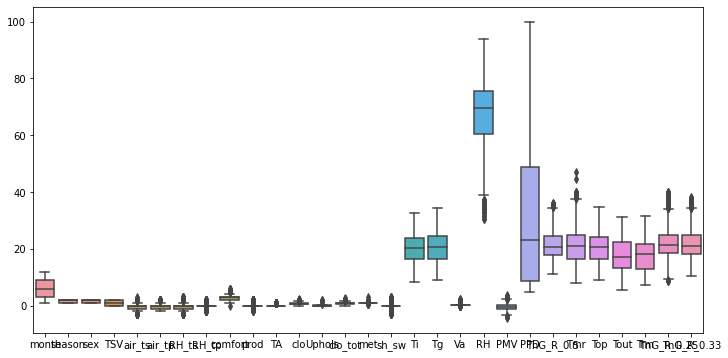

In [99]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)

#### Correation Matrix

<AxesSubplot:>

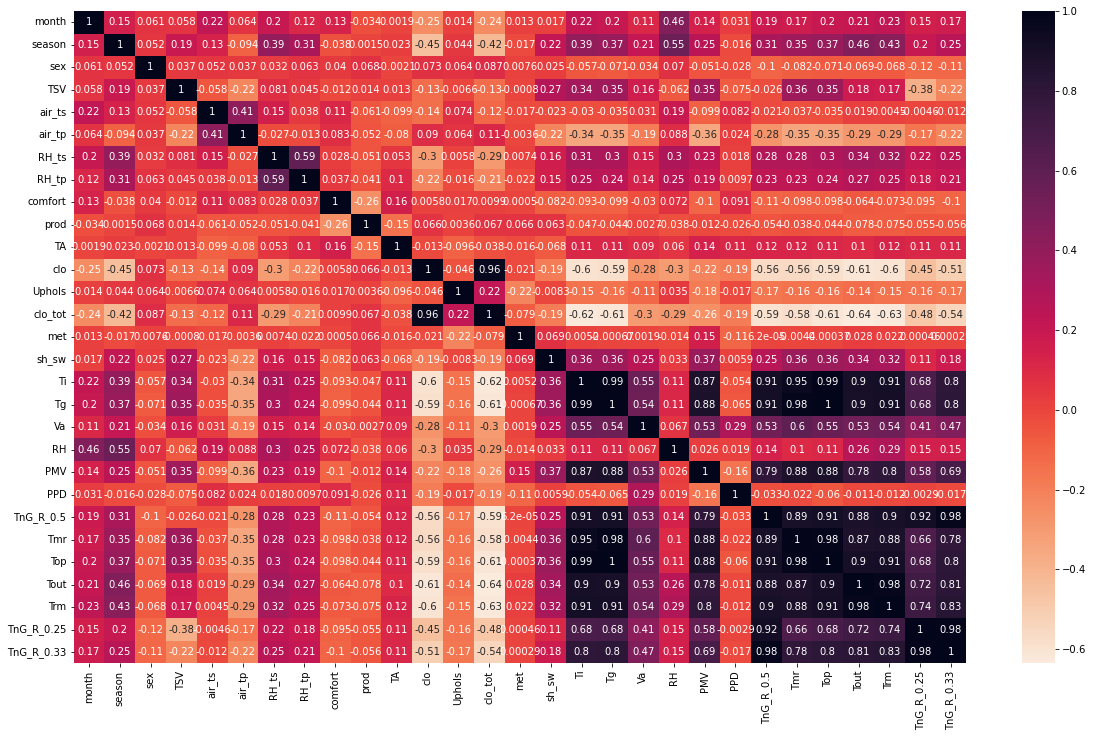

In [104]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,cmap='rocket_r')